In [1]:
# Import main libraries necessary for this project
import numpy as np
import pandas as pd
from IPython.display import display # Allows the use of display() for DataFrames

# Import libraries needed for reading image and processing it
import csv
from PIL import Image
from scipy.ndimage import rotate
import matplotlib.pyplot as plt

# Pretty display for notebooks
%matplotlib inline
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, BatchNormalization, Dropout, Dense
from keras.callbacks import ModelCheckpoint 

Using TensorFlow backend.


In [2]:
# Training digits images and labels files
letters_training_images_file_path  = "./dataVN/training images89_14240.zip"
letters_training_labels_file_path  = "./dataVN/training labels89_14240.zip"
# Testing digits images and labels files
letters_testing_images_file_path  = "./dataVN/testing images89_3560.zip"
letters_testing_labels_file_path  = "./dataVN/testing labels89_3560.zip"

# Loading dataset into dataframes
training_letters_images  = pd.read_csv(letters_training_images_file_path, compression='zip', header=None)
training_letters_labels  = pd.read_csv(letters_training_labels_file_path, compression='zip', header=None)
testing_letters_images  = pd.read_csv(letters_testing_images_file_path, compression='zip', header=None)
testing_letters_labels  = pd.read_csv(letters_testing_labels_file_path, compression='zip', header=None)

# print statistics about the dataset
print("There are %d training Vietname letter images of 64x64 pixels." %training_letters_images.shape[0])
print("There are %d testing Vietname letter images of 64x64 pixels." %testing_letters_images.shape[0])
training_letters_images.head()
testing_letters_images.head()

There are 14240 training Vietname letter images of 64x64 pixels.
There are 3560 testing Vietname letter images of 64x64 pixels.


,0,1,2,3,4,5,6,7,8,9,...,4086,4087,4088,4089,4090,4091,4092,4093,4094,4095
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
# Find the unique numbers from the train labels
classes = np.unique(training_letters_labels)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

Total number of outputs :  89
Output classes :  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88]


In [4]:
# Find the unique numbers from the train labels
classes = np.unique(testing_letters_labels)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

Total number of outputs :  89
Output classes :  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88]


In [5]:
training_letters_images = training_letters_images.values.astype('float32')/255
training_letters_labels = training_letters_labels.values.astype('int32')
testing_letters_images = testing_letters_images.values.astype('float32')/255
testing_letters_labels = testing_letters_labels.values.astype('int32')

In [6]:
print("Training images of letter after scaling")
print(training_letters_images.shape)
training_letters_images[0:5]
print("Testing images of letter after scaling")
print(testing_letters_images.shape)
testing_letters_images[0:5]

Training images of letter after scaling
(14240, 4096)
Testing images of letter after scaling
(3560, 4096)


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [7]:
from keras.utils import to_categorical

# one hot encoding
# number of classes = 10 (digits classes) + 89 (Vietnamese alphabet classes)
number_of_classes = 89
training_letters_labels_encoded = to_categorical(training_letters_labels, num_classes=number_of_classes)
testing_letters_labels_encoded = to_categorical(testing_letters_labels, num_classes=number_of_classes)
print(training_letters_labels_encoded)

[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [8]:
# reshape input letter images to 64x64x1
training_letters_images = training_letters_images.reshape([-1, 64, 64, 1])
testing_letters_images = testing_letters_images.reshape([-1, 64, 64, 1])


print(training_letters_images.shape, training_letters_labels.shape, testing_letters_images.shape, testing_letters_labels.shape)


(14240, 64, 64, 1) (14240, 1) (3560, 64, 64, 1) (3560, 1)


In [9]:
training_data_images = training_letters_images
training_data_labels = training_letters_labels_encoded
print("Total Training images are {} images of shape".format(training_data_images.shape[0]))
print(training_data_images.shape, training_data_labels.shape)


testing_data_images =testing_letters_images
testing_data_labels = testing_letters_labels_encoded
print("Total Testing images are {} images of shape".format(testing_data_images.shape[0]))
print(testing_data_images.shape, testing_data_labels.shape)

Total Training images are 14240 images of shape
(14240, 64, 64, 1) (14240, 89)
Total Testing images are 3560 images of shape
(3560, 64, 64, 1) (3560, 89)


In [11]:
  # create model
  model = Sequential()
  
  optimizer='adam'
  kernel_initializer='uniform'
  activation='relu'
  
  model.add(Conv2D(filters=16, kernel_size=3, padding='same', input_shape=(64, 64, 1), kernel_initializer=kernel_initializer, activation=activation))
  model.add(BatchNormalization())
  model.add(MaxPooling2D(pool_size=2))
  model.add(Dropout(0.2))

  model.add(Conv2D(filters=32, kernel_size=3, padding='same', kernel_initializer=kernel_initializer, activation=activation))
  model.add(BatchNormalization())
  model.add(MaxPooling2D(pool_size=2))
  model.add(Dropout(0.2))

  model.add(Conv2D(filters=64, kernel_size=3, padding='same', kernel_initializer=kernel_initializer, activation=activation))
  model.add(BatchNormalization())
  model.add(MaxPooling2D(pool_size=2))
  model.add(Dropout(0.2))

  model.add(Conv2D(filters=128, kernel_size=3, padding='same', kernel_initializer=kernel_initializer, activation=activation))
  model.add(BatchNormalization())
  model.add(MaxPooling2D(pool_size=2))
  model.add(Dropout(0.2))
  model.add(GlobalAveragePooling2D())
  
  #Fully connected final layer
  model.add(Dense(89, activation='softmax'))

  # Compile model
  model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=optimizer)
  

In [9]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 64, 64, 16)        160       
_________________________________________________________________
batch_normalization_1 (Batch (None, 64, 64, 16)        64        
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 16)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 32, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)        4640      
_________________________________________________________________
batch_normalization_2 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 32)       

In [23]:
from keras.callbacks import ModelCheckpoint  
epochs=10
batch_size=40
# using checkpoints to save model weights to be used later instead of training again on the same epochs.
checkpointer = ModelCheckpoint(filepath='./model/weights_001.hdf5', verbose=1, save_best_only=True)
history = model.fit(training_data_images, training_data_labels, 
                    validation_data=(testing_data_images, testing_data_labels),
                    epochs=epochs, batch_size=batch_size, verbose=1, callbacks=[checkpointer])

Train on 14240 samples, validate on 3560 samples
Epoch 1/10
14240/14240 [==============================] - 160s 11ms/step - loss: 2.8182 - accuracy: 0.3401 - val_loss: 7.8967 - val_accuracy: 0.0169

Epoch 00001: val_loss improved from inf to 7.89674, saving model to ./model/weights_001.hdf5
Epoch 2/10
14240/14240 [==============================] - 157s 11ms/step - loss: 1.2593 - accuracy: 0.7024 - val_loss: 1.5718 - val_accuracy: 0.5803

Epoch 00002: val_loss improved from 7.89674 to 1.57180, saving model to ./model/weights_001.hdf5
Epoch 3/10
14240/14240 [==============================] - 158s 11ms/step - loss: 0.6984 - accuracy: 0.8391 - val_loss: 1.3144 - val_accuracy: 0.6416

Epoch 00003: val_loss improved from 1.57180 to 1.31443, saving model to ./model/weights_001.hdf5
Epoch 4/10
14240/14240 [==============================] - 159s 11ms/step - loss: 0.4643 - accuracy: 0.8904 - val_loss: 0.7556 - val_accuracy: 0.8211

Epoch 00004: val_loss improved from 1.31443 to 0.75560, saving m

In [9]:
import matplotlib.pyplot as plt

def plot_loss_accuracy(history):
   # Accuracy Curves
  plt.figure(figsize=[8,2.5])
  plt.plot(history.history['accuracy'],'r',linewidth=2.0)
  plt.plot(history.history['val_accuracy'],'b',linewidth=2.0)
  plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=11)
  #plt.xlabel('Epochs ',fontsize=11)
  plt.ylabel('Accuracy',fontsize=11)
  plt.title('Accuracy Curves',fontsize=12)
     # Loss Curves
  plt.figure(figsize=[8,2.5])
  plt.plot(history.history['loss'],'r',linewidth=2.0)
  plt.plot(history.history['val_loss'],'b',linewidth=2.0)
  plt.legend(['Training loss', 'Validation Loss'],fontsize=11)
  plt.xlabel('Epochs ',fontsize=11)
  plt.ylabel('Loss',fontsize=11)
  plt.title('Loss Curves',fontsize=12)

3560/3560 [==============================] - 12s 3ms/step
Test Accuracy: 0.9426966309547424
Test Loss: 0.20373946508664764


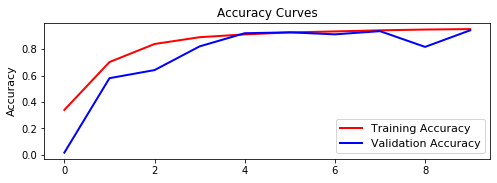

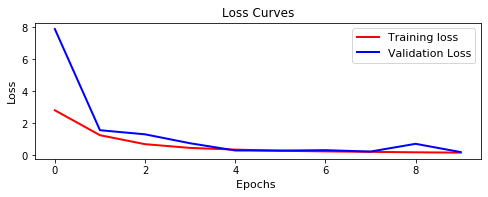

In [25]:
model.load_weights('./model/weights_001.hdf5')
# Final evaluation of the model
metrics = model.evaluate(testing_data_images, testing_data_labels,verbose=1)
print("Test Accuracy: {}".format(metrics[1]))
print("Test Loss: {}".format(metrics[0]))
plot_loss_accuracy(history)

In [26]:
from keras.callbacks import ModelCheckpoint  
epochs=20
batch_size=40
# using checkpoints to save model weights to be used later instead of training again on the same epochs.
checkpointer = ModelCheckpoint(filepath='./model/weights_002.hdf5', verbose=1, save_best_only=True)
history = model.fit(training_data_images, training_data_labels, 
                    validation_data=(testing_data_images, testing_data_labels),
                    epochs=epochs, batch_size=batch_size, verbose=1, callbacks=[checkpointer])

Train on 14240 samples, validate on 3560 samples
Epoch 1/20
14240/14240 [==============================] - 158s 11ms/step - loss: 0.1506 - accuracy: 0.9572 - val_loss: 0.2021 - val_accuracy: 0.9404

Epoch 00001: val_loss improved from inf to 0.20214, saving model to ./model/weights_002.hdf5
Epoch 2/20
14240/14240 [==============================] - 165s 12ms/step - loss: 0.1407 - accuracy: 0.9588 - val_loss: 0.2601 - val_accuracy: 0.9211

Epoch 00002: val_loss did not improve from 0.20214
Epoch 3/20
14240/14240 [==============================] - 166s 12ms/step - loss: 0.1288 - accuracy: 0.9636 - val_loss: 0.2605 - val_accuracy: 0.9239

Epoch 00003: val_loss did not improve from 0.20214
Epoch 4/20
14240/14240 [==============================] - 167s 12ms/step - loss: 0.1191 - accuracy: 0.9671 - val_loss: 0.2317 - val_accuracy: 0.9309

Epoch 00004: val_loss did not improve from 0.20214
Epoch 5/20
14240/14240 [==============================] - 165s 12ms/step - loss: 0.1153 - accuracy: 0.965

3560/3560 [==============================] - 8s 2ms/step
Test Accuracy: 0.9606741666793823
Test Loss: 0.1431977327672367


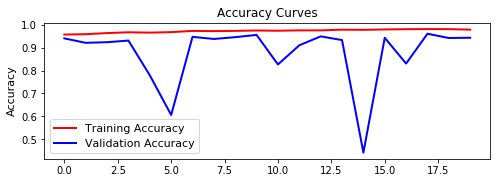

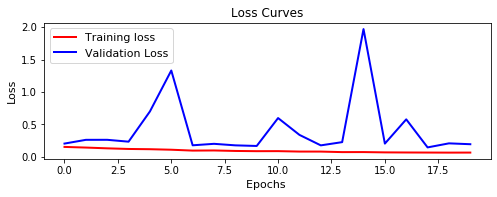

In [27]:
model.load_weights('./model/weights_002.hdf5')
# Final evaluation of the model
metrics = model.evaluate(testing_data_images, testing_data_labels,verbose=1)
print("Test Accuracy: {}".format(metrics[1]))
print("Test Loss: {}".format(metrics[0]))
plot_loss_accuracy(history)

In [14]:
from keras.callbacks import ModelCheckpoint  
epochs=100
batch_size=40
# using checkpoints to save model weights to be used later instead of training again on the same epochs.
checkpointer = ModelCheckpoint(filepath='./model/weights_003.hdf5', verbose=1, save_best_only=True)
history = model.fit(training_data_images, training_data_labels, 
                    validation_data=(testing_data_images, testing_data_labels),
                    epochs=epochs, batch_size=batch_size, verbose=1, callbacks=[checkpointer])

Train on 14240 samples, validate on 3560 samples
Epoch 1/100
14240/14240 [==============================] - 158s 11ms/step - loss: 0.0250 - accuracy: 0.9919 - val_loss: 0.2274 - val_accuracy: 0.9489

Epoch 00001: val_loss improved from inf to 0.22743, saving model to ./model/weights_003.hdf5
Epoch 2/100
14240/14240 [==============================] - 160s 11ms/step - loss: 0.0219 - accuracy: 0.9923 - val_loss: 0.2023 - val_accuracy: 0.9466

Epoch 00002: val_loss improved from 0.22743 to 0.20228, saving model to ./model/weights_003.hdf5
Epoch 3/100
14240/14240 [==============================] - 159s 11ms/step - loss: 0.0224 - accuracy: 0.9924 - val_loss: 0.1741 - val_accuracy: 0.9612

Epoch 00003: val_loss improved from 0.20228 to 0.17407, saving model to ./model/weights_003.hdf5
Epoch 4/100
14240/14240 [==============================] - 159s 11ms/step - loss: 0.0196 - accuracy: 0.9934 - val_loss: 0.1694 - val_accuracy: 0.9604

Epoch 00004: val_loss improved from 0.17407 to 0.16944, savi

3560/3560 [==============================] - 11s 3ms/step
Test Accuracy: 0.9632022380828857
Test Loss: 0.1371093548953846


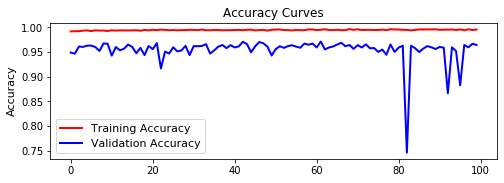

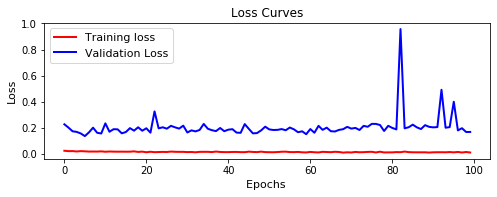

In [17]:
model.load_weights('./model/weights_003.hdf5')
# Final evaluation of the model
metrics = model.evaluate(testing_data_images, testing_data_labels,verbose=1)
print("Test Accuracy: {}".format(metrics[1]))
print("Test Loss: {}".format(metrics[0]))
plot_loss_accuracy(history)

In [30]:
from keras.callbacks import ModelCheckpoint  
epochs=200
batch_size=40
# using checkpoints to save model weights to be used later instead of training again on the same epochs.
checkpointer = ModelCheckpoint(filepath='./model/weights_014.hdf5', verbose=1, save_best_only=True)
history = model.fit(training_data_images, training_data_labels, 
                    validation_data=(testing_data_images, testing_data_labels),
                    epochs=epochs, batch_size=batch_size, verbose=1, callbacks=[checkpointer])

Train on 14240 samples, validate on 3560 samples
Epoch 1/200
14240/14240 [==============================] - 161s 11ms/step - loss: 0.0113 - accuracy: 0.9965 - val_loss: 0.1899 - val_accuracy: 0.9643

Epoch 00001: val_loss improved from inf to 0.18990, saving model to ./model/weights_014.hdf5
Epoch 2/200
14240/14240 [==============================] - 159s 11ms/step - loss: 0.0095 - accuracy: 0.9973 - val_loss: 0.2098 - val_accuracy: 0.9638

Epoch 00002: val_loss did not improve from 0.18990
Epoch 3/200
14240/14240 [==============================] - 159s 11ms/step - loss: 0.0093 - accuracy: 0.9968 - val_loss: 0.1953 - val_accuracy: 0.9601

Epoch 00003: val_loss did not improve from 0.18990
Epoch 4/200
14240/14240 [==============================] - 159s 11ms/step - loss: 0.0096 - accuracy: 0.9968 - val_loss: 0.2279 - val_accuracy: 0.9553

Epoch 00004: val_loss did not improve from 0.18990
Epoch 5/200
14240/14240 [==============================] - 159s 11ms/step - loss: 0.0089 - accuracy: 

3560/3560 [==============================] - 8s 2ms/step
Test Accuracy: 0.9702247381210327
Test Loss: 0.16211596008743914


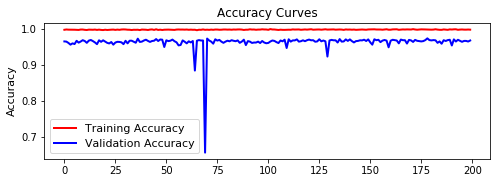

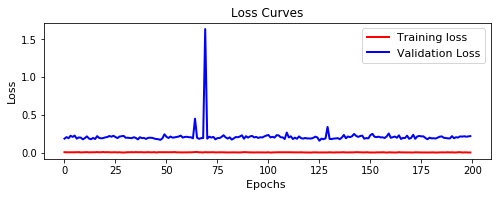

In [31]:
model.load_weights('./model/weights_014.hdf5')
# Final evaluation of the model
metrics = model.evaluate(testing_data_images, testing_data_labels,verbose=1)
print("Test Accuracy: {}".format(metrics[1]))
print("Test Loss: {}".format(metrics[0]))
plot_loss_accuracy(history)

In [28]:
from keras.callbacks import ModelCheckpoint  
epochs=10
batch_size=20
# using checkpoints to save model weights to be used later instead of training again on the same epochs.
checkpointer = ModelCheckpoint(filepath='./model/weights_004.hdf5', verbose=1, save_best_only=True)
history = model.fit(training_data_images, training_data_labels, 
                    validation_data=(testing_data_images, testing_data_labels),
                    epochs=epochs, batch_size=batch_size, verbose=1, callbacks=[checkpointer])

Train on 14240 samples, validate on 3560 samples
Epoch 1/10
14240/14240 [==============================] - 117s 8ms/step - loss: 0.1313 - accuracy: 0.9565 - val_loss: 0.5012 - val_accuracy: 0.8511

Epoch 00001: val_loss improved from inf to 0.50116, saving model to ./model/weights_004.hdf5
Epoch 2/10
14240/14240 [==============================] - 122s 9ms/step - loss: 0.1026 - accuracy: 0.9669 - val_loss: 0.1978 - val_accuracy: 0.9385

Epoch 00002: val_loss improved from 0.50116 to 0.19777, saving model to ./model/weights_004.hdf5
Epoch 3/10
14240/14240 [==============================] - 113s 8ms/step - loss: 0.0921 - accuracy: 0.9713 - val_loss: 0.1884 - val_accuracy: 0.9430

Epoch 00003: val_loss improved from 0.19777 to 0.18842, saving model to ./model/weights_004.hdf5
Epoch 4/10
14240/14240 [==============================] - 109s 8ms/step - loss: 0.0939 - accuracy: 0.9700 - val_loss: 0.1713 - val_accuracy: 0.9478

Epoch 00004: val_loss improved from 0.18842 to 0.17132, saving model

3560/3560 [==============================] - 8s 2ms/step
Test Accuracy: 0.9674157500267029
Test Loss: 0.13035192946769988


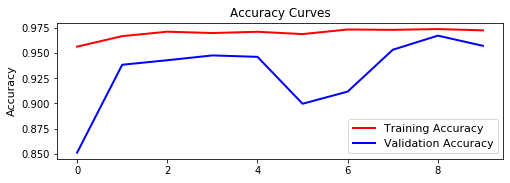

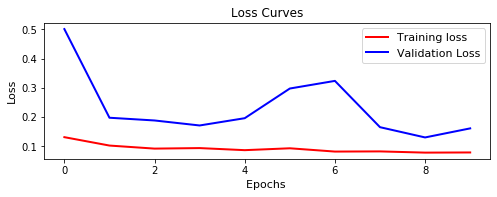

In [29]:
model.load_weights('./model/weights_004.hdf5')
# Final evaluation of the model
metrics = model.evaluate(testing_data_images, testing_data_labels,verbose=1)
print("Test Accuracy: {}".format(metrics[1]))
print("Test Loss: {}".format(metrics[0]))
plot_loss_accuracy(history)

In [13]:
from keras.callbacks import ModelCheckpoint  
epochs=20
batch_size=20
# using checkpoints to save model weights to be used later instead of training again on the same epochs.
checkpointer = ModelCheckpoint(filepath='./model/weights_005.hdf5', verbose=1, save_best_only=True)
history = model.fit(training_data_images, training_data_labels, 
                    validation_data=(testing_data_images, testing_data_labels),
                    epochs=epochs, batch_size=batch_size, verbose=1, callbacks=[checkpointer])

Train on 14240 samples, validate on 3560 samples
Epoch 1/20
14240/14240 [==============================] - 105s 7ms/step - loss: 0.1414 - accuracy: 0.9551 - val_loss: 0.1586 - val_accuracy: 0.9514

Epoch 00001: val_loss improved from inf to 0.15863, saving model to ./model/weights_005.hdf5
Epoch 2/20
14240/14240 [==============================] - 105s 7ms/step - loss: 0.1311 - accuracy: 0.9602 - val_loss: 0.2474 - val_accuracy: 0.9256

Epoch 00002: val_loss did not improve from 0.15863
Epoch 3/20
14240/14240 [==============================] - 105s 7ms/step - loss: 0.1160 - accuracy: 0.9630 - val_loss: 0.1999 - val_accuracy: 0.9416

Epoch 00003: val_loss did not improve from 0.15863
Epoch 4/20
14240/14240 [==============================] - 105s 7ms/step - loss: 0.1116 - accuracy: 0.9638 - val_loss: 0.3875 - val_accuracy: 0.8888

Epoch 00004: val_loss did not improve from 0.15863
Epoch 5/20
14240/14240 [==============================] - 103s 7ms/step - loss: 0.0974 - accuracy: 0.9690 - v

3560/3560 [==============================] - 8s 2ms/step
Test Accuracy: 0.9460673928260803
Test Loss: 0.18618826308337386


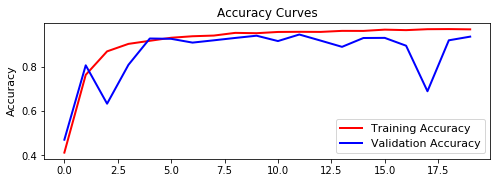

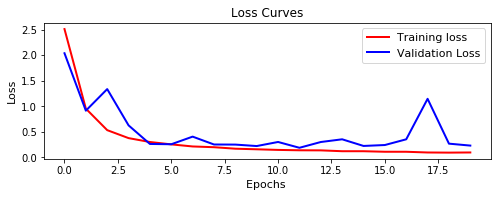

In [12]:
model.load_weights('./model/weights_005.hdf5')
# Final evaluation of the model
metrics = model.evaluate(testing_data_images, testing_data_labels,verbose=1)
print("Test Accuracy: {}".format(metrics[1]))
print("Test Loss: {}".format(metrics[0]))
plot_loss_accuracy(history)

3560/3560 [==============================] - 8s 2ms/step
Test Accuracy: 0.9589887857437134
Test Loss: 0.14988289936053242


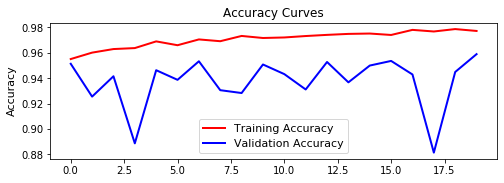

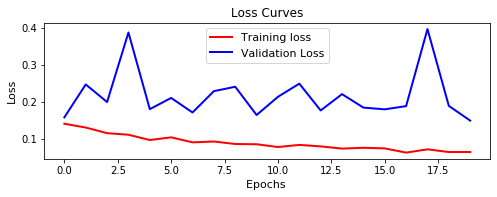

In [15]:
model.load_weights('./model/weights_005.hdf5')
# Final evaluation of the model
metrics = model.evaluate(testing_data_images, testing_data_labels,verbose=1)
print("Test Accuracy: {}".format(metrics[1]))
print("Test Loss: {}".format(metrics[0]))
plot_loss_accuracy(history)

In [9]:
from keras.callbacks import ModelCheckpoint  
epochs=50
batch_size=20
# using checkpoints to save model weights to be used later instead of training again on the same epochs.
checkpointer = ModelCheckpoint(filepath='./model/weights_006.hdf5', verbose=1, save_best_only=True)
history = model.fit(training_data_images, training_data_labels, 
                    validation_data=(testing_data_images, testing_data_labels),
                    epochs=epochs, batch_size=batch_size, verbose=1, callbacks=[checkpointer])

Train on 14240 samples, validate on 3560 samples
Epoch 1/50
14240/14240 [==============================] - 161s 11ms/step - loss: 2.5453 - accuracy: 0.3957 - val_loss: 2.2715 - val_accuracy: 0.3475

Epoch 00001: val_loss improved from inf to 2.27153, saving model to ./model/weights_006.hdf5
Epoch 2/50
14240/14240 [==============================] - 160s 11ms/step - loss: 0.9758 - accuracy: 0.7588 - val_loss: 0.9871 - val_accuracy: 0.7430

Epoch 00002: val_loss improved from 2.27153 to 0.98706, saving model to ./model/weights_006.hdf5
Epoch 3/50
14240/14240 [==============================] - 160s 11ms/step - loss: 0.5252 - accuracy: 0.8711 - val_loss: 0.6224 - val_accuracy: 0.8022

Epoch 00003: val_loss improved from 0.98706 to 0.62236, saving model to ./model/weights_006.hdf5
Epoch 4/50
14240/14240 [==============================] - 160s 11ms/step - loss: 0.3760 - accuracy: 0.9058 - val_loss: 0.4995 - val_accuracy: 0.8713

Epoch 00004: val_loss improved from 0.62236 to 0.49945, saving m

3560/3560 [==============================] - 8s 2ms/step
Test Accuracy: 0.9609550833702087
Test Loss: 0.13025277549272737


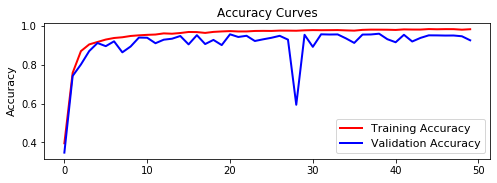

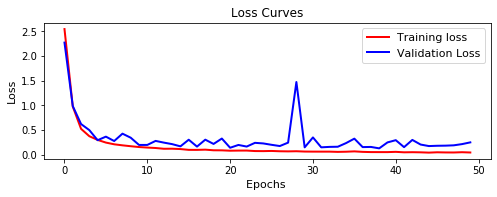

In [12]:
model.load_weights('./model/weights_006.hdf5')
# Final evaluation of the model
metrics = model.evaluate(testing_data_images, testing_data_labels,verbose=1)
print("Test Accuracy: {}".format(metrics[1]))
print("Test Loss: {}".format(metrics[0]))
plot_loss_accuracy(history)

In [10]:
from keras.callbacks import ModelCheckpoint  
epochs=100
batch_size=20
# using checkpoints to save model weights to be used later instead of training again on the same epochs.
checkpointer = ModelCheckpoint(filepath='./model/weights_007.hdf5', verbose=1, save_best_only=True)
history = model.fit(training_data_images, training_data_labels, 
                    validation_data=(testing_data_images, testing_data_labels),
                    epochs=epochs, batch_size=batch_size, verbose=1, callbacks=[checkpointer])

Train on 14240 samples, validate on 3560 samples
Epoch 1/100
14240/14240 [==============================] - 167s 12ms/step - loss: 2.5552 - accuracy: 0.3909 - val_loss: 1.7912 - val_accuracy: 0.5435

Epoch 00001: val_loss improved from inf to 1.79117, saving model to ./model/weights_007.hdf5
Epoch 2/100
14240/14240 [==============================] - 163s 11ms/step - loss: 0.9897 - accuracy: 0.7552 - val_loss: 1.0376 - val_accuracy: 0.6904

Epoch 00002: val_loss improved from 1.79117 to 1.03761, saving model to ./model/weights_007.hdf5
Epoch 3/100
14240/14240 [==============================] - 162s 11ms/step - loss: 0.5422 - accuracy: 0.8690 - val_loss: 0.4619 - val_accuracy: 0.8705

Epoch 00003: val_loss improved from 1.03761 to 0.46188, saving model to ./model/weights_007.hdf5
Epoch 4/100
14240/14240 [==============================] - 160s 11ms/step - loss: 0.3841 - accuracy: 0.9014 - val_loss: 2.1408 - val_accuracy: 0.4118

Epoch 00004: val_loss did not improve from 0.46188
Epoch 5/1

3560/3560 [==============================] - 8s 2ms/step
Test Accuracy: 0.9676966071128845
Test Loss: 0.13544862474247177


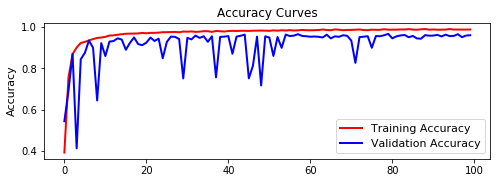

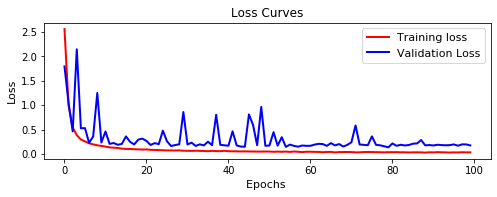

In [11]:
model.load_weights('./model/weights_007.hdf5')
# Final evaluation of the model
metrics = model.evaluate(testing_data_images, testing_data_labels,verbose=1)
print("Test Accuracy: {}".format(metrics[1]))
print("Test Loss: {}".format(metrics[0]))
plot_loss_accuracy(history)

In [12]:
from keras.callbacks import ModelCheckpoint  
epochs=200
batch_size=20
# using checkpoints to save model weights to be used later instead of training again on the same epochs.
checkpointer = ModelCheckpoint(filepath='./model/weights_008.hdf5', verbose=1, save_best_only=True)
history = modelfit(training_data_images, training_data_labels, 
                    validation_data=(testing_data_images, testing_data_labels),
                    epochs=epochs, batch_size=batch_size, verbose=1, callbacks=[checkpointer])

Train on 14240 samples, validate on 3560 samples
Epoch 1/200
14240/14240 [==============================] - 106s 7ms/step - loss: 0.0392 - accuracy: 0.9864 - val_loss: 0.1803 - val_accuracy: 0.9624

Epoch 00001: val_loss improved from inf to 0.18030, saving model to ./model/weights_008.hdf5
Epoch 2/200
14240/14240 [==============================] - 106s 7ms/step - loss: 0.0367 - accuracy: 0.9879 - val_loss: 0.1838 - val_accuracy: 0.9618

Epoch 00002: val_loss did not improve from 0.18030
Epoch 3/200
14240/14240 [==============================] - 105s 7ms/step - loss: 0.0358 - accuracy: 0.9874 - val_loss: 0.2052 - val_accuracy: 0.9489

Epoch 00003: val_loss did not improve from 0.18030
Epoch 4/200
14240/14240 [==============================] - 106s 7ms/step - loss: 0.0298 - accuracy: 0.9900 - val_loss: 0.1913 - val_accuracy: 0.9581

Epoch 00004: val_loss did not improve from 0.18030
Epoch 5/200
14240/14240 [==============================] - 106s 7ms/step - loss: 0.0392 - accuracy: 0.986

3560/3560 [==============================] - 7s 2ms/step
Test Accuracy: 0.9634831547737122
Test Loss: 0.1415567109730648


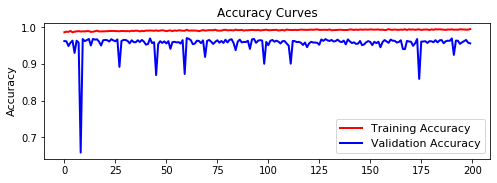

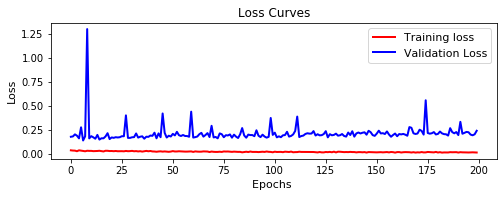

In [13]:
model.load_weights('./model/weights_008.hdf5')
# Final evaluation of the model
metrics = model.evaluate(testing_data_images, testing_data_labels,verbose=1)
print("Test Accuracy: {}".format(metrics[1]))
print("Test Loss: {}".format(metrics[0]))
plot_loss_accuracy(history)

In [18]:
from keras.callbacks import ModelCheckpoint  
epochs=10
batch_size=32
# using checkpoints to save model weights to be used later instead of training again on the same epochs.
checkpointer = ModelCheckpoint(filepath='./model/weights_009.hdf5', verbose=1, save_best_only=True)
history = model.fit(training_data_images, training_data_labels, 
                    validation_data=(testing_data_images, testing_data_labels),
                    epochs=epochs, batch_size=batch_size, verbose=1, callbacks=[checkpointer])

Train on 14240 samples, validate on 3560 samples
Epoch 1/10
14240/14240 [==============================] - 158s 11ms/step - loss: 0.0229 - accuracy: 0.9921 - val_loss: 0.1985 - val_accuracy: 0.9449

Epoch 00001: val_loss improved from inf to 0.19849, saving model to ./model/weights_009.hdf5
Epoch 2/10
14240/14240 [==============================] - 159s 11ms/step - loss: 0.0205 - accuracy: 0.9926 - val_loss: 0.1915 - val_accuracy: 0.9587

Epoch 00002: val_loss improved from 0.19849 to 0.19150, saving model to ./model/weights_009.hdf5
Epoch 3/10
14240/14240 [==============================] - 159s 11ms/step - loss: 0.0238 - accuracy: 0.9920 - val_loss: 0.1954 - val_accuracy: 0.9517

Epoch 00003: val_loss did not improve from 0.19150
Epoch 4/10
14240/14240 [==============================] - 159s 11ms/step - loss: 0.0250 - accuracy: 0.9914 - val_loss: 0.1776 - val_accuracy: 0.9573

Epoch 00004: val_loss improved from 0.19150 to 0.17761, saving model to ./model/weights_009.hdf5
Epoch 5/10
14

3560/3560 [==============================] - 11s 3ms/step
Test Accuracy: 0.964606761932373
Test Loss: 0.16289863152324574


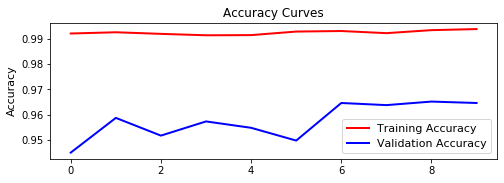

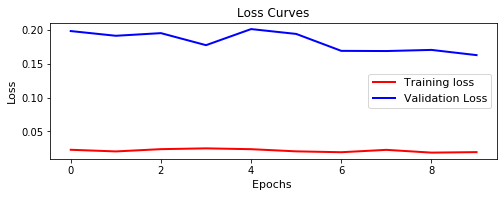

In [19]:
model.load_weights('./model/weights_009.hdf5')
# Final evaluation of the model
metrics = model.evaluate(testing_data_images, testing_data_labels,verbose=1)
print("Test Accuracy: {}".format(metrics[1]))
print("Test Loss: {}".format(metrics[0]))
plot_loss_accuracy(history)

In [20]:
from keras.callbacks import ModelCheckpoint  
epochs=20
batch_size=32
# using checkpoints to save model weights to be used later instead of training again on the same epochs.
checkpointer = ModelCheckpoint(filepath='./model/weights_010.hdf5', verbose=1, save_best_only=True)
history = model.fit(training_data_images, training_data_labels, 
                    validation_data=(testing_data_images, testing_data_labels),
                    epochs=epochs, batch_size=batch_size, verbose=1, callbacks=[checkpointer])

Train on 14240 samples, validate on 3560 samples
Epoch 1/20
14240/14240 [==============================] - 159s 11ms/step - loss: 0.0195 - accuracy: 0.9940 - val_loss: 0.1844 - val_accuracy: 0.9590

Epoch 00001: val_loss improved from inf to 0.18436, saving model to ./model/weights_010.hdf5
Epoch 2/20
14240/14240 [==============================] - 159s 11ms/step - loss: 0.0225 - accuracy: 0.9926 - val_loss: 0.1823 - val_accuracy: 0.9610

Epoch 00002: val_loss improved from 0.18436 to 0.18232, saving model to ./model/weights_010.hdf5
Epoch 3/20
14240/14240 [==============================] - 159s 11ms/step - loss: 0.0216 - accuracy: 0.9923 - val_loss: 0.1885 - val_accuracy: 0.9590

Epoch 00003: val_loss did not improve from 0.18232
Epoch 4/20
14240/14240 [==============================] - 159s 11ms/step - loss: 0.0179 - accuracy: 0.9937 - val_loss: 0.1773 - val_accuracy: 0.9626

Epoch 00004: val_loss improved from 0.18232 to 0.17730, saving model to ./model/weights_010.hdf5
Epoch 5/20
14

3560/3560 [==============================] - 7s 2ms/step
Test Accuracy: 0.958707869052887
Test Loss: 0.16253390483037988


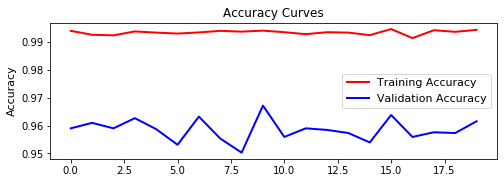

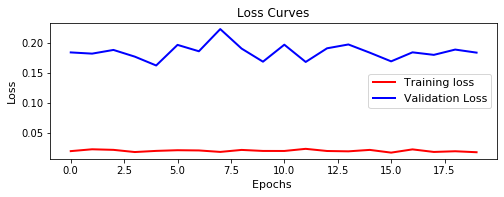

In [22]:
model.load_weights('./model/weights_010.hdf5')
# Final evaluation of the model
metrics = model.evaluate(testing_data_images, testing_data_labels,verbose=1)
print("Test Accuracy: {}".format(metrics[1]))
print("Test Loss: {}".format(metrics[0]))
plot_loss_accuracy(history)

In [24]:
from keras.callbacks import ModelCheckpoint  
epochs=100
batch_size=32
# using checkpoints to save model weights to be used later instead of training again on the same epochs.
checkpointer = ModelCheckpoint(filepath='./model/weights_011.hdf5', verbose=1, save_best_only=True)
history = model.fit(training_data_images, training_data_labels, 
                    validation_data=(testing_data_images, testing_data_labels),
                    epochs=epochs, batch_size=batch_size, verbose=1, callbacks=[checkpointer])

Train on 14240 samples, validate on 3560 samples
Epoch 1/100
14240/14240 [==============================] - 114s 8ms/step - loss: 0.0242 - accuracy: 0.9912 - val_loss: 0.1746 - val_accuracy: 0.9581

Epoch 00001: val_loss improved from inf to 0.17461, saving model to ./model/weights_011.hdf5
Epoch 2/100
14240/14240 [==============================] - 114s 8ms/step - loss: 0.0200 - accuracy: 0.9934 - val_loss: 0.2094 - val_accuracy: 0.9562

Epoch 00002: val_loss did not improve from 0.17461
Epoch 3/100
14240/14240 [==============================] - 111s 8ms/step - loss: 0.0196 - accuracy: 0.9928 - val_loss: 0.1920 - val_accuracy: 0.9579

Epoch 00003: val_loss did not improve from 0.17461
Epoch 4/100
14240/14240 [==============================] - 113s 8ms/step - loss: 0.0198 - accuracy: 0.9930 - val_loss: 0.2296 - val_accuracy: 0.9478

Epoch 00004: val_loss did not improve from 0.17461
Epoch 5/100
14240/14240 [==============================] - 110s 8ms/step - loss: 0.0193 - accuracy: 0.993

3560/3560 [==============================] - 8s 2ms/step
Test Accuracy: 0.968539297580719
Test Loss: 0.1394363606579906


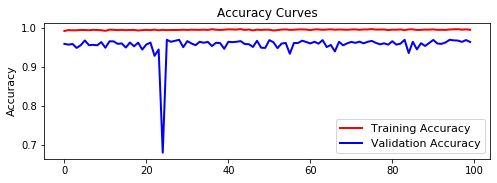

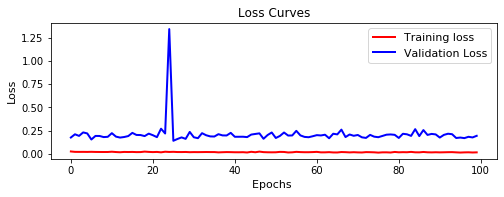

In [25]:
model.load_weights('./model/weights_011.hdf5')
# Final evaluation osf the model
metrics = model.evaluate(testing_data_images, testing_data_labels,verbose=1)
print("Test Accuracy: {}".format(metrics[1]))
print("Test Loss: {}".format(metrics[0]))
plot_loss_accuracy(history)

In [26]:
from keras.callbacks import ModelCheckpoint  
epochs=200
batch_size=32
# using checkpoints to save model weights to be used later instead of training again on the same epochs.
checkpointer = ModelCheckpoint(filepath='./model/weights_012.hdf5', verbose=1, save_best_only=True)
history = model.fit(training_data_images, training_data_labels, 
                    validation_data=(testing_data_images, testing_data_labels),
                    epochs=epochs, batch_size=batch_size, verbose=1, callbacks=[checkpointer])

Train on 14240 samples, validate on 3560 samples
Epoch 1/200
14240/14240 [==============================] - 103s 7ms/step - loss: 0.0168 - accuracy: 0.9944 - val_loss: 0.2229 - val_accuracy: 0.9461

Epoch 00001: val_loss improved from inf to 0.22289, saving model to ./model/weights_012.hdf5
Epoch 2/200
14240/14240 [==============================] - 104s 7ms/step - loss: 0.0198 - accuracy: 0.9932 - val_loss: 0.1860 - val_accuracy: 0.9565

Epoch 00002: val_loss improved from 0.22289 to 0.18596, saving model to ./model/weights_012.hdf5
Epoch 3/200
14240/14240 [==============================] - 104s 7ms/step - loss: 0.0185 - accuracy: 0.9937 - val_loss: 0.1711 - val_accuracy: 0.9635

Epoch 00003: val_loss improved from 0.18596 to 0.17109, saving model to ./model/weights_012.hdf5
Epoch 4/200
14240/14240 [==============================] - 104s 7ms/step - loss: 0.0179 - accuracy: 0.9949 - val_loss: 0.1957 - val_accuracy: 0.9604

Epoch 00004: val_loss did not improve from 0.17109
Epoch 5/200
1

3560/3560 [==============================] - 8s 2ms/step
Test Accuracy: 0.9702247381210327
Test Loss: 0.1609696040978385


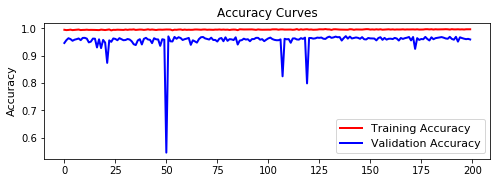

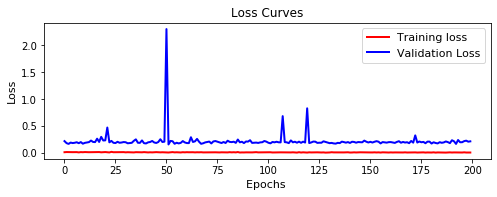

In [27]:
model.load_weights('./model/weights_012.hdf5')
# Final evaluation of the model
metrics = model.evaluate(testing_data_images, testing_data_labels,verbose=1)
print("Test Accuracy: {}".format(metrics[1]))
print("Test Loss: {}".format(metrics[0]))
plot_loss_accuracy(history)

In [28]:
from keras.callbacks import ModelCheckpoint  
epochs=300
batch_size=32
# using checkpoints to save model weights to be used later instead of training again on the same epochs.
checkpointer = ModelCheckpoint(filepath='./model/weights_013.hdf5', verbose=1, save_best_only=True)
history = model.fit(training_data_images, training_data_labels, 
                    validation_data=(testing_data_images, testing_data_labels),
                    epochs=epochs, batch_size=batch_size, verbose=1, callbacks=[checkpointer])

Train on 14240 samples, validate on 3560 samples
Epoch 1/300
14240/14240 [==============================] - 106s 7ms/step - loss: 0.0171 - accuracy: 0.9940 - val_loss: 0.2012 - val_accuracy: 0.9621

Epoch 00001: val_loss improved from inf to 0.20119, saving model to ./model/weights_013.hdf5
Epoch 2/300
14240/14240 [==============================] - 105s 7ms/step - loss: 0.0145 - accuracy: 0.9945 - val_loss: 0.1977 - val_accuracy: 0.9621

Epoch 00002: val_loss improved from 0.20119 to 0.19774, saving model to ./model/weights_013.hdf5
Epoch 3/300
14240/14240 [==============================] - 105s 7ms/step - loss: 0.0141 - accuracy: 0.9951 - val_loss: 0.2193 - val_accuracy: 0.9584

Epoch 00003: val_loss did not improve from 0.19774
Epoch 4/300
14240/14240 [==============================] - 105s 7ms/step - loss: 0.0170 - accuracy: 0.9938 - val_loss: 0.2052 - val_accuracy: 0.9601

Epoch 00004: val_loss did not improve from 0.19774
Epoch 5/300
14240/14240 [==============================] - 

3560/3560 [==============================] - 8s 2ms/step
Test Accuracy: 0.9699438214302063
Test Loss: 0.16398719317421317


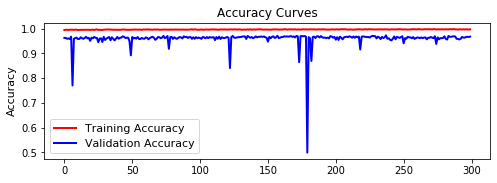

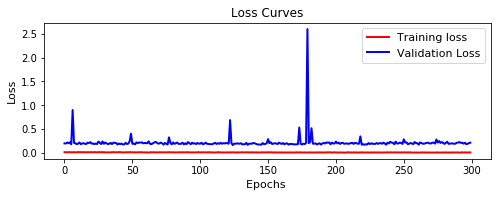

In [29]:
model.load_weights('./model/weights_013.hdf5')
# Final evaluation of the model
metrics = model.evaluate(testing_data_images, testing_data_labels,verbose=1)
print("Test Accuracy: {}".format(metrics[1]))
print("Test Loss: {}".format(metrics[0]))
plot_loss_accuracy(history)

In [13]:
model.load_weights('./model/weights_012.hdf5')
from keras.models import model_from_yaml
model_yaml = model.to_yaml()
with open("./model/model_final.yaml", "w") as yaml_file:
    yaml_file.write(model_yaml)
    # serialize weights to HDF5
model.save_weights("./model/model_final.h5")
print("Saved model to disk")

Saved model to disk


In [15]:
from keras.models import load_model
from keras.models import model_from_yaml
import yaml

yaml_file = open('./model/model_final.yaml', 'r')
loaded_model_yaml = yaml_file.read()
yaml_file.close()
loaded_model = model_from_yaml(loaded_model_yaml)
# load weights into new model
loaded_model.load_weights("./model/model_final.h5")
print("Loaded model from disk")

# compile the loaded model
loaded_model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])

Loaded model from disk


In [23]:
from sklearn.metrics import classification_report
num_classes=89
test_Y=testing_letters_labels
target_names = ["Class {}".format(i) for i in range(num_classes)]
print(classification_report(test_Y, predicted_classes, target_names=target_names))

              precision    recall  f1-score   support

     Class 0       0.91      0.97      0.94        40
     Class 1       1.00      0.97      0.99        40
     Class 2       0.98      1.00      0.99        40
     Class 3       0.95      1.00      0.98        40
     Class 4       1.00      0.97      0.99        40
     Class 5       0.98      1.00      0.99        40
     Class 6       1.00      0.97      0.99        40
     Class 7       0.87      1.00      0.93        40
     Class 8       0.93      1.00      0.96        40
     Class 9       0.97      0.97      0.97        40
    Class 10       1.00      1.00      1.00        40
    Class 11       1.00      1.00      1.00        40
    Class 12       1.00      0.85      0.92        40
    Class 13       0.98      1.00      0.99        40
    Class 14       0.97      0.93      0.95        40
    Class 15       1.00      0.97      0.99        40
    Class 16       1.00      1.00      1.00        40
    Class 17       1.00    

In [26]:
from sklearn.metrics import confusion_matrix
preds = loaded_model.predict(testing_data_images)
predicts = np.argmax(preds, axis = 1)
Y_test = np.argmax(testing_data_labels, axis =1)

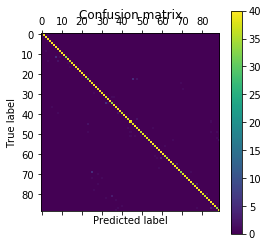

In [27]:
cm = confusion_matrix(Y_test, predicts)
plt.matshow(cm)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [29]:
print('Actual_labels  |  Predicted_labels')
for i in range(100):
    print('      %3d      |     %3d' %(Y_test[i], predicts[i]))

Actual_labels  |  Predicted_labels
        0      |       0
        1      |       1
       12      |      12
       12      |      12
       12      |      12
       12      |      12
       12      |      12
       13      |      13
       13      |      13
       13      |      13
       13      |      13
       13      |      13
        1      |       1
       13      |      13
       13      |      13
       13      |      13
       14      |      14
       14      |      14
       14      |      14
       14      |      14
       14      |      14
       14      |      14
       14      |      14
        1      |       1
       14      |      14
       15      |      15
       15      |      15
       15      |      15
       15      |      15
       15      |      15
       15      |      15
       15      |      15
       15      |      15
       16      |      16
        1      |       1
       16      |      16
       16      |      16
       16      |      16
       16      

In [30]:
import numpy as np
from PIL import Image
from keras.preprocessing.image import img_to_array
import argparse
#import imutils
import cv2

In [31]:
img="./test/test_img01.png"

The letter is:  Ầ
This is image handwritten character Vietnamese:


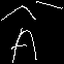

In [32]:
 labels = {0: 'A', 1: 'B', 2: 'C', 3: 'D', 4: 'Đ', 5: 'E', 6: 'G', 7: 'H', 8: 'I', 9: 'K', 10: 'L', 11: 'M',
                  12: 'N', 13: 'O', 14: 'P', 15: 'Q', 16: 'R', 17: 'S', 18: 'T', 19: 'U', 20: 'V', 21: 'X', 22: 'Y',
                  23: 'Ơ', 24: 'Ư', 25: 'Ă', 26: 'Â', 27: 'À', 28: 'Ả', 29: 'Ã', 30: 'Á', 31: 'Ạ', 32: 'Ê', 33: 'È',
                  34: 'Ẻ', 35: 'Ẽ', 36: 'É', 37: 'Ẹ', 38: 'Ì', 39: 'Ỉ', 40: 'Ĩ', 41: 'Í', 42: 'Ị', 43: 'Ô', 44: 'Ò',
                  45: 'Ỏ', 46: 'Õ', 47: 'Ó', 48: 'Ọ', 49: 'Ờ', 50: 'Ở', 51: 'Ỡ', 52: 'Ớ', 53: 'Ợ', 54: 'Ù', 55: 'Ủ',
                  56: 'Ũ', 57: 'Ú', 58: 'Ụ', 59: 'Ừ', 60: 'Ử', 61: 'Ữ', 62: 'Ứ', 63: 'Ự', 64: 'Ỳ', 65: 'Ỷ', 66: 'Ỹ',
                  67: 'Ý', 68: 'Ỵ', 69: 'Ằ', 70: 'Ẳ', 71: 'Ẵ', 72: 'Ắ', 73: 'Ặ', 74: 'Ầ', 75: 'Ẩ', 76: 'Ẫ', 77: 'Ấ',
                  78: 'Ậ', 79: 'Ề', 80: 'Ể', 81: 'Ễ', 82: 'Ế', 83: 'Ệ', 84: 'Ồ', 85: 'Ổ', 86: 'Ỗ', 87: 'Ố', 88: 'Ộ'}
#orig = image.copy()
image = cv2.imread(img)
# pre-process the image for classification
image = cv2.resize(image, (64,64))
image = image.astype("float") / 255.0
image = img_to_array(image)
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
#print image.shape
image = np.expand_dims(image, axis=0)
#print image.shape
image = np.expand_dims(image, axis=3)
#print image.shape
# load the trained convolutional neural network

# classify the input image
lists = loaded_model.predict(image)[0]
print("The letter is: ",labels[np.argmax(lists)])
print("This is image handwritten character Vietnamese:")
im = Image.open(img).convert('LA')
width = float(im.size[0])
height = float(im.size[1])
im.resize([64,64])